C:\Users\hp\anaconda3\envs\dlc_py310\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


Original shape: (60000, 28, 28) (60000,)
Epoch 1/5
422/422 [==============================] - 31s 67ms/step - loss: 0.2117 - accuracy: 0.9402 - val_loss: 0.0740 - val_accuracy: 0.9780
Epoch 2/5
422/422 [==============================] - 28s 65ms/step - loss: 0.0602 - accuracy: 0.9810 - val_loss: 0.0496 - val_accuracy: 0.9858
Epoch 3/5
422/422 [==============================] - 29s 69ms/step - loss: 0.0414 - accuracy: 0.9873 - val_loss: 0.0389 - val_accuracy: 0.9898
Epoch 4/5
422/422 [==============================] - 28s 66ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.0361 - val_accuracy: 0.9895
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0347 - accuracy: 0.9894

Test Accuracy: 98.94%
1/1 [==============================] - 0s 287ms/step


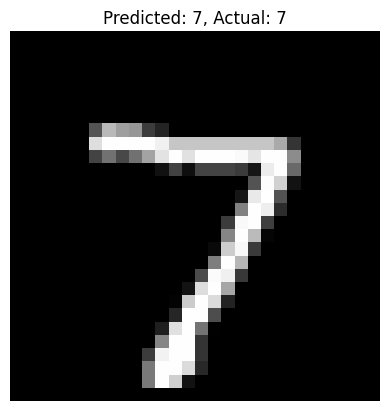

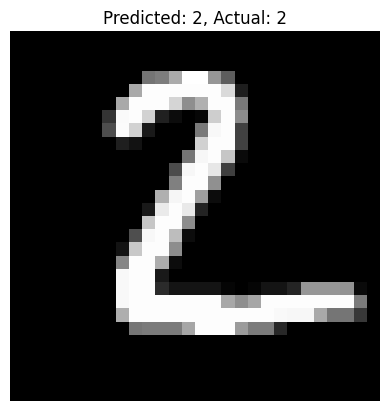

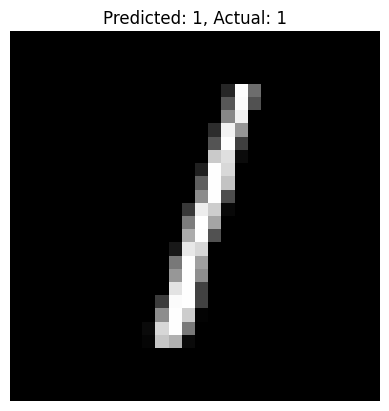

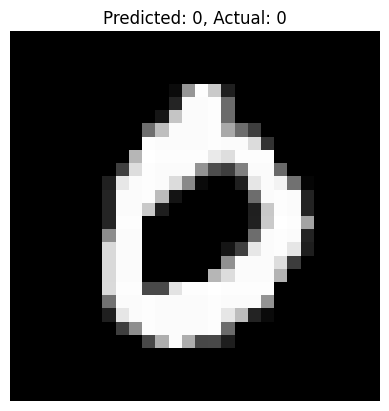

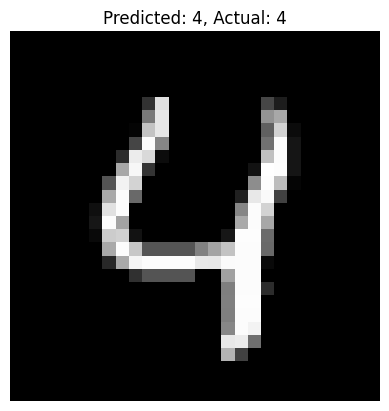

In [1]:
# Step 1: Import required libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Original shape:", x_train.shape, y_train.shape)

# Step 3: Normalize and reshape image data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # reshape and normalize
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Step 4: One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Step 5: Build CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

# Step 8: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

# Step 9: Display predictions for first 5 test images
predictions = model.predict(x_test[:5])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:5], axis=1)

for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}, Actual: {true_classes[i]}")
    plt.axis('off')
    plt.show()